## Rooted-in graph

We consider a rooted-in branching graph to understand the symmetrization procedure. Consensus dynamics defined with respect to the out-degree Laplacian should achieve consensus because the Laplacian kernel is one-dimensional.

In [1]:
%run ../imports.py

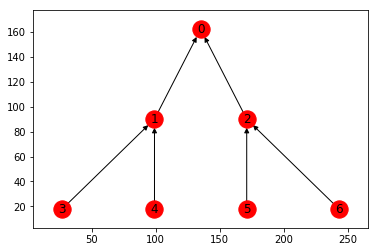

In [2]:
G = nx.balanced_tree(create_using=nx.DiGraph, h=2, r=2)
revG = G.reverse()
lay = graphviz_layout(G, prog='dot')
nx.draw_networkx(revG, pos=lay)

In [3]:
revG.remove_edge(6,2)
revG.remove_edge(4,1)

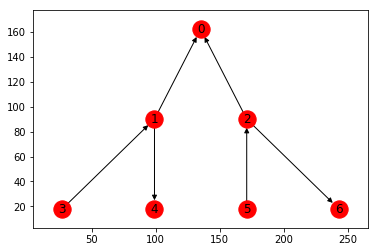

In [4]:
revG.add_edge(2,6)
revG.add_edge(1,4)
nx.draw_networkx(revG, pos=lay)

In [5]:
L = out_degree_laplacian(revG)
np.linalg.matrix_rank(L)

4

In [6]:
L

matrix([[ 0,  0,  0,  0,  0,  0,  0],
        [-1,  2,  0,  0, -1,  0,  0],
        [-1,  0,  2,  0,  0,  0, -1],
        [ 0, -1,  0,  1,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0, -1,  0,  0,  1,  0],
        [ 0,  0,  0,  0,  0,  0,  0]], dtype=int64)

### Symmetrization

In [7]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [8]:
print(Q)

[[-4.8087e-01  5.6521e-01  5.6521e-01 -8.4340e-02 -2.4043e-01 -8.4340e-02
  -2.4043e-01]
 [-8.1460e-17  6.4550e-01 -6.4550e-01 -1.2910e-01 -2.5820e-01  1.2910e-01
   2.5820e-01]
 [-4.1081e-01 -1.7475e-01 -1.7475e-01  5.8557e-01 -2.0541e-01  5.8557e-01
  -2.0541e-01]
 [-9.0116e-18 -1.0757e-16 -3.6131e-18 -6.3246e-01  3.1623e-01  6.3246e-01
  -3.1623e-01]]


In [9]:
print(eqL)

[[ 0.5739 -0.5478 -0.5478 -0.0261  0.287  -0.0261  0.287 ]
 [-0.5478  1.7242 -0.1329 -0.4621 -0.6311 -0.0335  0.0832]
 [-0.5478 -0.1329  1.7242 -0.0335  0.0832 -0.4621 -0.6311]
 [-0.0261 -0.4621 -0.0335  0.6311 -0.0845 -0.0832  0.0584]
 [ 0.287  -0.6311  0.0832 -0.0845  0.3578  0.0584 -0.0708]
 [-0.0261 -0.0335 -0.4621 -0.0832  0.0584  0.6311 -0.0845]
 [ 0.287   0.0832 -0.6311  0.0584 -0.0708 -0.0845  0.3578]]


Separate the resulting graph into two subgraphs: one with all positive edges and another with the negative ones.

In [10]:
np.linalg.matrix_rank(eqL)

4

In [11]:
posG, negG = separate_graphs(eqL)

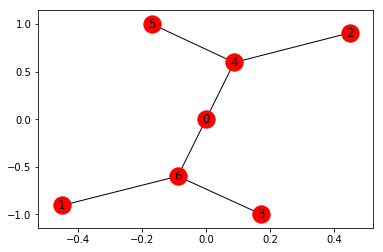

In [13]:
nx.draw_networkx(negG)

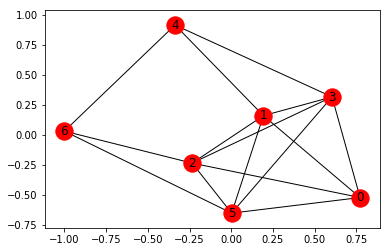

In [14]:
nx.draw_networkx(posG)

There are negative weights appearing with a one-dimensional kernel. We will see below that the consensus is acheived, demonstrating the correctness of the implementation. It is to be noted that the resulting graph Laplacian is not signed, i.e. the degree of a node is the sum of all adjacent edge weights with sign.

## Consensus

In [14]:
N = nx.number_of_nodes(revG)

In [15]:
init = np.random.rand(N)

In [16]:
f1 = lambda t,x: -np.asarray(L.dot(x))[0]
f2 = lambda t,x: -np.asarray(eqL.dot(x))[0]

In [17]:
res1 = solve_ivp(fun=f1, t_span=[0,20], y0=init)
res2 = solve_ivp(fun=f2, t_span=[0,20], y0=init)

In [18]:
res1.y[:,-1]

array([0.313 , 0.313 , 0.545 , 0.313 , 0.313 , 0.5448, 0.7768])

In [19]:
res2.y[:,-1]

array([0.3821, 0.3824, 0.6146, 0.3824, 0.3824, 0.614 , 0.8456])